In [1]:
!pip install pandas
!pip install matplotlib
!pip install sklearn

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
s = time.time()
log2 = pd.read_csv('../data_format1/user_log_format1-2.csv', sep=',')
info2 = pd.read_csv('../data_format1/user_info_format1-2.csv',sep=',') 
train2 = pd.read_csv('../data_format1/train_format1-2.csv',sep=',') 
print('cost time:',time.time()-s)

cost time: 63.93757772445679


# Def

## Basic Info

In [4]:
def basic_info_count(df, label):
    unique_list = df[label].unique()
    unique_num = len(unique_list)
    print('Unique %s number:'%label, unique_num)
    
    
def describe_df(df):
    print('df.index:',df.index)
    print('len(df):',len(df))
    print('df.columns:',df.columns,'\n')

## Type A: Single table

In [5]:
def basic_info_A(df, label):
    a = df[label]
#     dc = a.describe()
#     print('%s:\n'%label,dc,'\n','---------------')
    Amedian = a.median()
    print('\nmedian:',Amedian,'\n','---------------')
    Amode = a.mode()
    print('\nmode:\n',Amode,'\n','---------------')
    Aquantile = [a.quantile(i) for i in [0.25,.075]]
    print('\nquantile:',Aquantile,'\n','---------------')


def accumulate_A(df,label, name_list):    
    # reconstruction dataframe
    Acount = df[label].value_counts()
    Acount_df = pd.DataFrame(Acount)   # make series be df
    Acount_df.sort_index(inplace=True)    # sort df by index
    Acount_df.insert(0, 'name', name_list)
    Acount_df['percentage'] = Acount_df[label]/Acount_df[label].sum()    # insert a persentage column
    Acount_df['accumulate']=Acount_df[label].cumsum()    # insert a column that accumulate 'age_range'
    Acount_df['accumulate_percentage'] = Acount_df['percentage'].cumsum()
    print(Acount_df)
    return Acount_df


def count_bar_A(df, label,title,xlab,ylab):
    plt.bar(df['name'], df[label])
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    for i in range(len(df[label])):
        plt.text(i, df[label][i], df[label][i], ha='center')
    plt.show()


def percentage_pie(df, label, title):
    plt.pie(df[label], labels = df['name'], autopct='%1.1f%%')
    plt.title(title)
    plt.show()

def accumulate_percentage_bar_A(df, label,title,xlab,ylab):
    plt.bar(df['name'], df[label])
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.show()

## Type B: Mutiple Table

In [6]:
def crosstable_B(series1, series2, table_name):
    table = pd.crosstab(series1, series2)
    print(table_name,'\n---------------------------------------------------')
    print(table)
    print('\n')

    print('%s in persentage'%table_name,'\n---------------------------------------------------')
    print(table/table.sum().sum()*100)
    return table

    
def frequency_bar(table, title, xlab, ylab):
    table.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
#     plt.show()
    print()



#    

# Main

## Basic Info

In [7]:
# info of tables
print('info of tables','\n---------------')
describe_df(log2)
describe_df(info2)
describe_df(train2)
print('\n===============================================================\n')


# uniqe number of 'user_log_format1-2.csv'
print("uniqe number of 'user_log_format1-2.csv'",'\n------------------------------------------')
basic_info_count(log2, 'user_id')
basic_info_count(log2, 'item_id')
basic_info_count(log2, 'cat_id')
basic_info_count(log2, 'seller_id')
basic_info_count(log2, 'brand_id')


info of tables 
---------------
df.index: RangeIndex(start=0, stop=54925330, step=1)
len(df): 54925330
df.columns: Index(['user_id', 'item_id', 'cat_id', 'seller_id', 'brand_id', 'time_stamp',
       'action_type'],
      dtype='object') 

df.index: RangeIndex(start=0, stop=424170, step=1)
len(df): 424170
df.columns: Index(['user_id', 'age_range', 'gender'], dtype='object') 

df.index: RangeIndex(start=0, stop=260864, step=1)
len(df): 260864
df.columns: Index(['user_id', 'merchant_id', 'label'], dtype='object') 



uniqe number of 'user_log_format1-2.csv' 
------------------------------------------
Unique user_id number: 424170
Unique item_id number: 1090390
Unique cat_id number: 1658
Unique seller_id number: 4995
Unique brand_id number: 8444


## Age info
from: user_info_format1-2.csv   
type: A


median: 3.0 
 ---------------

mode:
 0    3.0
dtype: float64 
 ---------------

quantile: [2.0, 0.0] 
 ---------------
        name  age_range  percentage  accumulate  accumulate_percentage
0.0  unknown      95131    0.224276       95131               0.224276
1.0      <18         24    0.000057       95155               0.224332
2.0    18-24      52871    0.124646      148026               0.348978
3.0    25-29     111654    0.263229      259680               0.612207
4.0    30-34      79991    0.188582      339671               0.800790
5.0    35-39      40777    0.096134      380448               0.896923
6.0    40-49      35464    0.083608      415912               0.980531
7.0      <50       8258    0.019469      424170               1.000000


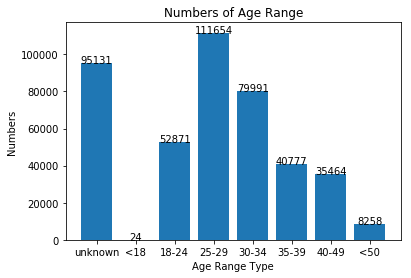

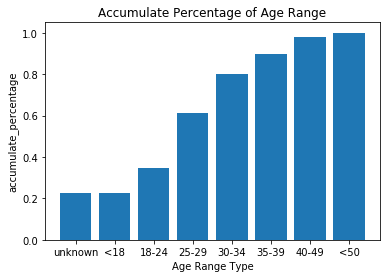

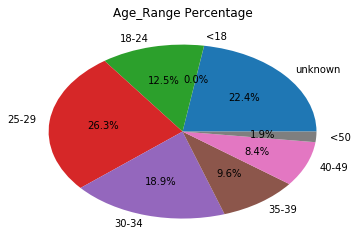

In [8]:
basic_info_A(info2,'age_range')
name_list=['unknown','<18','18-24','25-29','30-34','35-39','40-49','<50']
age_df = accumulate_A(info2,'age_range',name_list) 

count_bar_A(age_df,'age_range','Numbers of Age Range','Age Range Type','Numbers')
accumulate_percentage_bar_A(age_df,'accumulate_percentage','Accumulate Percentage of Age Range','Age Range Type','accumulate_percentage')
percentage_pie(age_df, 'percentage', 'Age_Range Percentage')

## Gender info
from: train_format1-2.csv   
type: A


median: 0.0 
 ---------------

mode:
 0    0.0
dtype: float64 
 ---------------

quantile: [0.0, 0.0] 
 ---------------
        name  gender  percentage  accumulate  accumulate_percentage
0.0   female  285638    0.673405      285638               0.673405
1.0     male  121670    0.286843      407308               0.960247
2.0  unknown   16862    0.039753      424170               1.000000


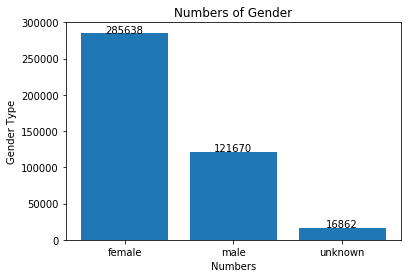

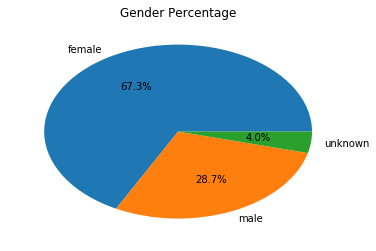

In [9]:
basic_info_A(info2,'gender')
name_list = ['female', 'male', 'unknown']
gender_df = accumulate_A(info2,'gender', name_list) 

count_bar_A(gender_df,'gender','Numbers of Gender','Numbers','Gender Type')
percentage_pie(gender_df, 'percentage', 'Gender Percentage')

## Label info
from train_format1-2.csv   
type: A


median: 0.0 
 ---------------

mode:
 0    0.0
dtype: float64 
 ---------------

quantile: [0.0, 0.0] 
 ---------------
                   name   label  percentage  accumulate  accumulate_percentage
0.0  none repeat buyer   244912    0.938849      244912               0.938849
1.0        repeat buyer   15952    0.061151      260864               1.000000


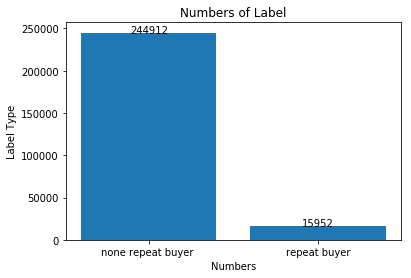

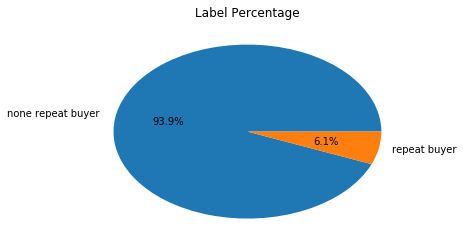

In [10]:
basic_info_A(train2,'label')
name_list=['none repeat buyer ','repeat buyer']
Label_df = accumulate_A(train2,'label',name_list) 

count_bar_A(Label_df,'label','Numbers of Label','Numbers','Label Type')
percentage_pie(Label_df, 'percentage', 'Label Percentage')

## Gender and Age Range
from: user_info_format1-2.csv   
type: B

Frequency amoung Gender and Age Range 
---------------------------------------------------
gender       0.0    1.0   2.0
age_range                    
0.0        66813  22655  5663
1.0           18      6     0
2.0        33692  18309   870
3.0        74609  33217  3828
4.0        52032  23708  4251
5.0        27823  11462  1492
6.0        25160   9745   559
7.0         5491   2568   199


Frequency amoung Gender and Age Range in persentage 
---------------------------------------------------
gender           0.0       1.0       2.0
age_range                               
0.0        15.751468  5.341019  1.335078
1.0         0.004244  0.001415  0.000000
2.0         7.943042  4.316430  0.205106
3.0        17.589410  7.831058  0.902468
4.0        12.266780  5.589268  1.002193
5.0         6.559398  2.702218  0.351746
6.0         5.931584  2.297428  0.131787
7.0         1.294528  0.605418  0.046915



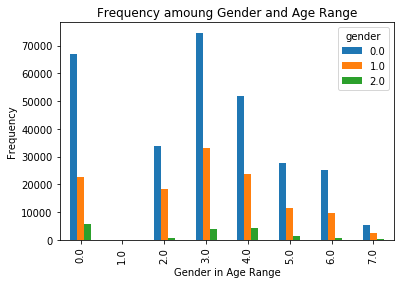

In [11]:
# Frequency amoung Gender and Age Range
actions_gender = crosstable_B(info2.age_range, info2.gender, 'Frequency amoung Gender and Age Range')
frequency_bar(actions_gender, 'Frequency amoung Gender and Age Range', 'Gender in Age Range', 'Frequency')

## Actions to Gender
from: user_info_format1-2.csv  &  user_log_format1-2.csv   
type: B

Frequency amoung Actions and Gender 
---------------------------------------------------
gender          0.0     1.0    2.0
action_type                       
0            252228  107568  14860
1               198      88     10
2             19744    8134   1131
3             13468    5880    861


Frequency amoung Actions and Gender in persentage 
---------------------------------------------------
gender             0.0        1.0       2.0
action_type                                
0            59.463894  25.359644  3.503312
1             0.046679   0.020746  0.002358
2             4.654737   1.917627  0.266638
3             3.175142   1.386237  0.202985



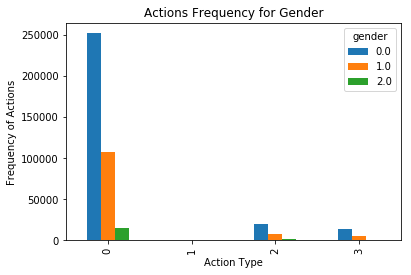

In [12]:
# Frequency of Actions to Gender
actions_gender = crosstable_B(log2.action_type,info2.gender, 'Frequency amoung Actions and Gender')
frequency_bar(actions_gender, 'Actions Frequency for Gender', 'Action Type', 'Frequency of Actions')

## Actions to Age
from: user_info_format1-2.csv & user_log_format1-2.csv   
type: B

Frequency amoung Actions and Age 
---------------------------------------------------
age_range      0.0  1.0    2.0    3.0    4.0    5.0    6.0   7.0
action_type                                                     
0            84027   21  46785  98510  70633  36051  31344  7285
1               57    0     38     75     60     33     27     6
2             6583    3   3610   7709   5386   2711   2434   573
3             4464    0   2438   5360   3912   1982   1659   394


Frequency amoung Actions and Age in persentage 
---------------------------------------------------
age_range          0.0       1.0        2.0        3.0        4.0       5.0  \
action_type                                                                   
0            19.809746  0.004951  11.029776  23.224179  16.652050  8.499187   
1             0.013438  0.000000   0.008959   0.017682   0.014145  0.007780   
2             1.551972  0.000707   0.851074   1.817432   1.269774  0.639131   
3             1.052408  0.0

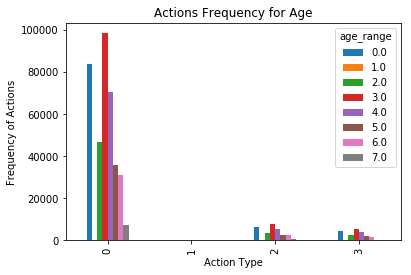

In [13]:
# Frequency of Actions to Age
actions_gender = crosstable_B(log2.action_type,info2.age_range, 'Frequency amoung Actions and Age')
frequency_bar(actions_gender, 'Actions Frequency for Age', 'Action Type', 'Frequency of Actions')

## Action to Age and Gender
from: user_info_format1-2.csv & user_log_format1-2.csv   
type: B

action_type           0   1     2     3
age_range gender                       
0.0       0.0     59017  44  4667  3085
          1.0     20028  12  1526  1089
          2.0      4982   1   390   290
1.0       0.0        16   0     2     0
          1.0         5   0     1     0
2.0       0.0     29794  24  2340  1534
          1.0     16232  14  1202   861
          2.0       759   0    68    43
3.0       0.0     65740  44  5233  3592
          1.0     29383  27  2233  1574
          2.0      3387   4   243   194
4.0       0.0     45991  40  3502  2499
          1.0     20899  17  1597  1195
          2.0      3743   3   287   218
5.0       0.0     24583  21  1865  1354
          1.0     10149  10   750   553
          2.0      1319   2    96    75
6.0       0.0     22219  20  1764  1157
          1.0      8628   7   633   477
          2.0       497   0    37    25
7.0       0.0      4868   5   371   247
          1.0      2244   1   192   131
          2.0       173   0    10    16


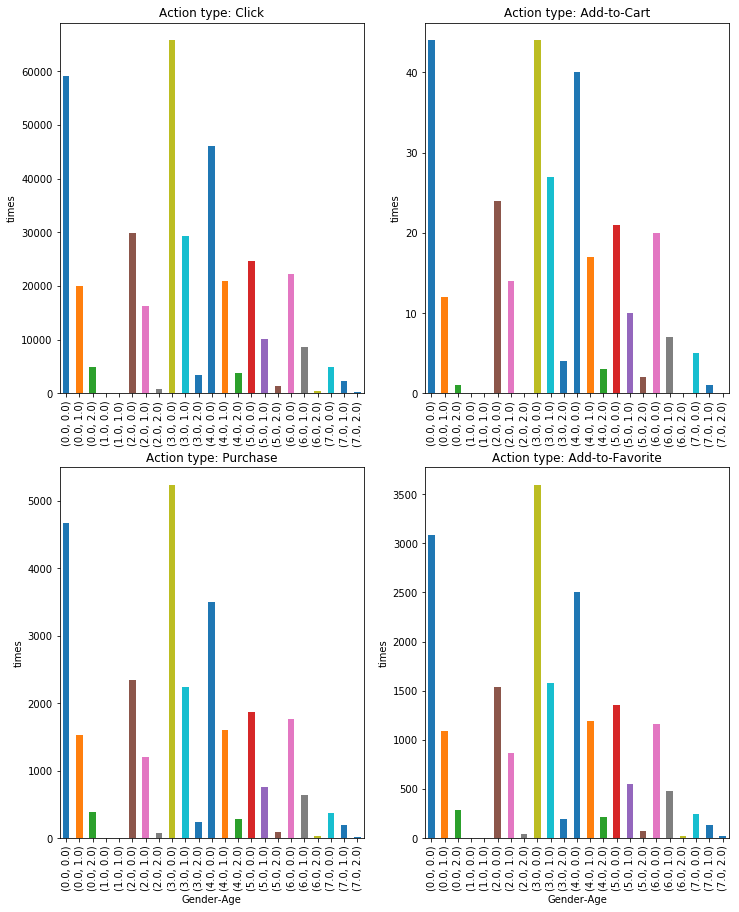

In [14]:
age_gender_act = pd.crosstab([info2.age_range,info2.gender],log2.action_type)
print(age_gender_act)

plt.figure(figsize=(12,15))
plt.subplot(2,2,1)
frequency_bar(age_gender_act[0], 'Action type: Click', '', 'times')
plt.subplot(2,2,2)
frequency_bar(age_gender_act[1], 'Action type: Add-to-Cart', '', 'times')
plt.subplot(2,2,3)
frequency_bar(age_gender_act[2], 'Action type: Purchase', 'Gender-Age', 'times')
plt.subplot(2,2,4)
frequency_bar(age_gender_act[3], 'Action type: Add-to-Favorite', 'Gender-Age', 'times')
plt.show()

## LogisticRegression   
from: user_info_format1-2.csv & user_log_format1-2.csv

In [16]:
data = pd.merge(log2, info2, how='left', on='user_id')
print(data.head(5))
lr = LogisticRegression()
x = []
y = []
for d in data:
    x += [[d[0], d[1], d[3]]]
    y += [[1 if d[2]>0 else 0]]

lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type  \
0   328862   323294     833       2882    2661.0         829            0   
1   328862   844400    1271       2882    2661.0         829            0   
2   328862   575153    1271       2882    2661.0         829            0   
3   328862   996875    1271       2882    2661.0         829            0   
4   328862  1086186    1271       1253    1049.0         829            0   

   age_range  gender  
0        6.0     1.0  
1        6.0     1.0  
2        6.0     1.0  
3        6.0     1.0  
4        6.0     1.0  


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
nx = np.array(x)
ny = np.array(y)

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

nx_1 = np.concatenate((np.ones((nx.shape[0], 1)), nx), axis=1)
w = np.array([lr.intercept_[0]] + [wi for wi in lr.coef_[0]])

t = nx_1.dot(w)
p = sigmoid(t)

plt.scatter(t, p)
plt.scatter(t, ny, s=6)
# plt.axis([-10, 10, -.1, 1.1])
np.where(t>40)
nx[np.where(t>40)]

In [ ]:
y_hat = lr.predict(nx)


# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print("roc_auc_score: ", roc_auc_score(ny, y_hat))
print("roc_auc_score: ", roc_auc_score(ny, lr.predict(nx)))

pred_prob = sigmoid(t) 

# fpr0, tpr0, thresholds0 = roc_curve(ny, pred_prob)
fpr1, tpr1, thresholds1 = roc_curve(ny, lr.predict_proba(nx)[:,1])

def roc_graph(fpr=fpr1, tpr=tpr1):
#     fig = plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y, y_hat))
    plt.plot([0, 1], [0, 1],'w--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()
#     return fig

roc_graph()